#### Import Packages

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
df = pd.read_csv("dataset/historical_data.csv")

#### Data Preparation

In [3]:
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0
197427,1.0,2015-02-08 19:24:33,2015-02-08 20:01:41,3630,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0,446,134.0


In [4]:
# number of rows and features
df.shape

(197428, 16)

<AxesSubplot:>

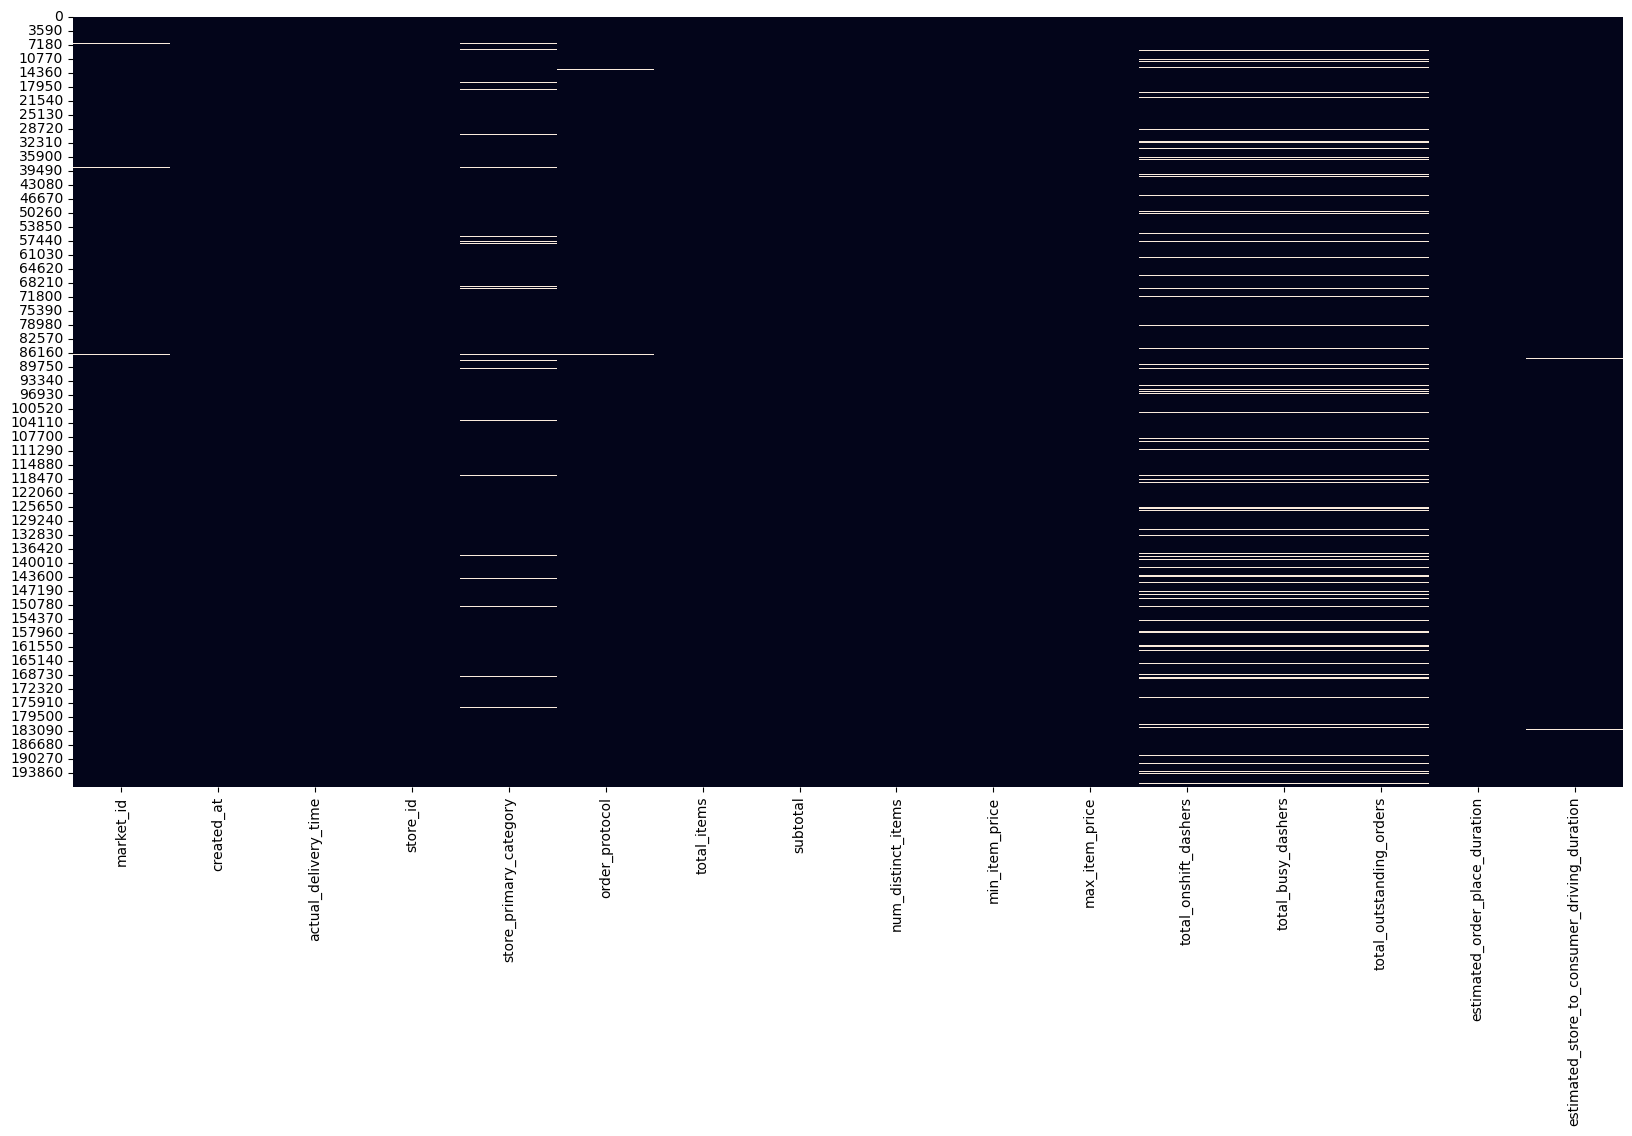

In [5]:
# visualize the missing data
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [6]:
# percentage of empty values by features
(df.isna().sum()/df.shape[0]).sort_values()

created_at                                      0.000000
store_id                                        0.000000
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
estimated_order_place_duration                  0.000000
actual_delivery_time                            0.000035
estimated_store_to_consumer_driving_duration    0.002664
market_id                                       0.004999
order_protocol                                  0.005040
store_primary_category                          0.024110
total_onshift_dashers                           0.082369
total_busy_dashers                              0.082369
total_outstanding_orders                        0.082369
dtype: float64

In [7]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [8]:
# converting to datetime 
df["created_at"] = pd.to_datetime(df['created_at'])
df["actual_delivery_time"] = pd.to_datetime(df['actual_delivery_time'])

In [9]:
# checking categoraical features
df["market_id"].nunique()

6

As an order has many modes which stores in order_protocol. So it might have an affect on delivery time. 

In [10]:
df["order_protocol"].nunique()

7

Another categorical feature is `store_primary_category` but there are some null values which have to fill first.

In [11]:
# manually checking how many store_primary_category a store_id has
df[df["store_id"] == 2956 ]["store_primary_category"].value_counts()

fast       75
korean      1
seafood     1
indian      1
Name: store_primary_category, dtype: int64

In [12]:
# cross check with market_id - same store with different primary category in the same market or not
df.groupby(['store_id', 'store_primary_category']).nunique()

market_id  created_at  actual_delivery_time  \
store_id store_primary_category                                                
1        mexican                         1           8                     8   
2        japanese                        1           5                     5   
3        fast                            1           1                     1   
         salad                           1           2                     2   
4        asian                           1           1                     1   
...                                    ...         ...                   ...   
6986     fast                            1          35                    35   
         indian                          1           1                     1   
         other                           1           1                     1   
         pasta                           1           1                     1   
6987     american                        1           2                     2   

                                 order_protocol  total_items  subtotal  \
store_id store_primary_category                                          
1        mexican                              2            5         8   
2        japanese                             1            4         5   
3        fast                                 1            1         1   
         salad                                1            2         2   
4        asian                                1            1         1   
...                                         ...          ...       ...   
6986     fast                                 1           11        29   
         indian                               1            1         1   
         other                                1            1         1   
         pasta                                1            1         1   
6987     american                             1            2         2   

                                 num_distinct_items  min_item_price  \
store_id store_primary_category                                       
1        mexican                                  3               5   
2        japanese                                 3               5   
3        fast                                     1               1   
         salad                                    2               1   
4        asian                                    1               1   
...                                             ...             ...   
6986     fast                                     6               9   
         indian                                   1               1   
         other                                    1               1   
         pasta                                    1               1   
6987     american                                 2               2   

                                 max_item_price  total_onshift_dashers  \
store_id store_primary_category                                          
1        mexican                              6                      7   
2        japanese                             5                      5   
3        fast                                 1                      1   
         salad                                2                      1   
4        asian                                1                      1   
...                                         ...                    ...   
6986     fast                                 9                     30   
         indian                               1                      1   
         other                                1                      1   
         pasta                                1                      1   
6987     american                             2                      2   

                                 total_busy_dashers  total_outstanding_orders  \
store_id store_primary_category                              

In [13]:
df[df.store_id == 2956 ].groupby(['market_id', 'store_primary_category']).nunique()

created_at  actual_delivery_time  store_id  \
market_id store_primary_category                                               
1.0       fast                            74                    74         1   
2.0       indian                           1                     1         1   
          korean                           1                     1         1   
4.0       fast                             1                     1         1   
          seafood                          1                     1         1   

                                  order_protocol  total_items  subtotal  \
market_id store_primary_category                                          
1.0       fast                                 1            9        69   
2.0       indian                               1            1         1   
          korean                               1            1         1   
4.0       fast                                 1            1         1   
          seafood                              1            1         1   

                                  num_distinct_items  min_item_price  \
market_id store_primary_category                                       
1.0       fast                                     5              30   
2.0       indian                                   1               1   
          korean                                   1               1   
4.0       fast                                     1               1   
          seafood                                  1               1   

                                  max_item_price  total_onshift_dashers  \
market_id store_primary_category                                          
1.0       fast                                32                     41   
2.0       indian                               1                      1   
          korean                               1                      1   
4.0       fast                                 1                      1   
          seafood                              1                      1   

                                  total_busy_dashers  \
market_id store_primary_category                       
1.0       fast                                    41   
2.0       indian                                   1   
          korean                                   1   
4.0       fast                                     1   
          seafood                                  1   

                                  total_outstanding_orders  \
market_id store_primary_category                             
1.0       fast                                          45   
2.0       indian                                         1   
          korean                                         1   
4.0       fast                                           1   
          seafood                                        1   

                                  estimated_order_place_duration  \
market_id store_primary_category                                   
1.0       fast                                                 1   
2.0       indian                                               1   
          korean                                               1   
4.0       fast                                                 1   
          seafood                                              1   

                                  estimated_store_to_consumer_driving_duration  
market_id store_primary_category                                                
1.0       fast                                                              60  
2.0       indian                                                             1  
          korean                                                             1  
4.0       fast                                                               1  
          seafood                                                            1

So, we've seen that stores have multiple primary category in the same market. As, the `store_primary_category` is not depend upon market we can use the most repeated primary category with the associated store to fill this store's null primary category column as well replace other primary categories of a store with the most repeated one.

In [14]:
store_id_unique = df["store_id"].unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() 
                         for store_id in store_id_unique}

Sometimes one store contain same number of different primary_category then we can choose any of the category.

In [15]:
def fill(store_id):
    """Return primary store category from the dictionary"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# fill null values
df["wo_nan_store_primary_category"] = df.store_id.apply(fill)

#### Exploratory Data Analysis

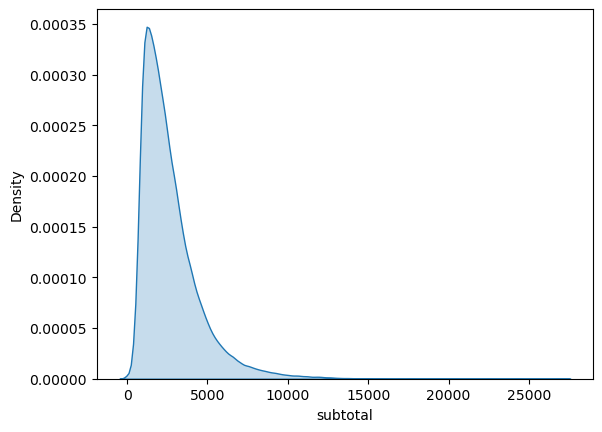

In [16]:
# distribution of subtotal
sns.kdeplot(df['subtotal'], shade=True)
plt.show()

#### Feature Engineering

One hot encoding

In [17]:
# create dummies for order_protocol
order_protocol_dummies = pd.get_dummies(df.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head(2)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0


In [18]:
# create dummies for market_id
market_id_dummies = pd.get_dummies(df.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head(2)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0


In [19]:
# create dummies for store primary category
store_primary_category_dummies = pd.get_dummies(df.wo_nan_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head(2)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# creating the target variable
df["actual_total_delivery_duration"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()

In [21]:
# creating new feature - estimated_non_prep_duration 
df['estimated_non_prep_duration'] = df["estimated_store_to_consumer_driving_duration"] + df["estimated_order_place_duration"]

In [22]:
# creating new feature - busy_dashers_ratio
df["busy_dashers_ratio"] = df["total_busy_dashers"] / df["total_onshift_dashers"]

In [23]:
# checking if there's any ratio over 1
df[df["busy_dashers_ratio"] > 1].shape[0]

40373

In [24]:
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,wo_nan_store_primary_category,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,american,3779.0,1307.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,indian,4024.0,1136.0,2.000000


In [25]:
# dropping unwanted columns
train_df = df.drop(columns = ["market_id", "created_at", "actual_delivery_time", "store_id", "store_primary_category", 
                                        "order_protocol", "wo_nan_store_primary_category"])
train_df.head(2)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000


In [26]:
# concatenate created features
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)
# align dtype over dataset
train_df = train_df.astype("float32")
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# check the final dataset
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# let's check the busy_dashers_ratio - there's a chance of number/0
train_df["busy_dashers_ratio"].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

We need to replace all infinity values with nan to drop since they are not useful in the prediction.

In [29]:
# check infinity values with using numpy isfinite() function
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([ 5,  6,  7,  9, 10, 11, 12], dtype=int64),)

In [30]:
# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop all nans
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

In [31]:
# cross-chek there is not any remaining nans
train_df.isna().sum().sum()

0

#### Remove Redundant and Collinear Features

We have 100 columns in our final dataset, which means there might be redundant features. These features are not useful in a way by repeating another feature or having a zero standard deviation. Therefore, doesn't add any new knowledge to ML models. Another potential problem is collinearity. We will check all of them. We start with the correlation matrix.

Correlation Matrix: A visusal representation containing the corelation coefficients between the variables dataframe.

In [32]:
# it could take some time to run this cell since we are calculating correlation matrix in a dimesion of (100x100)
# to have a better visualization, we will take only one triangle 
# because other trangle is only its symmetry (i.e a x b and b x a)

corr = train_df.corr() # to create data showing correlation

In [33]:
corr

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
total_items,1.000000,0.557175,0.758146,-0.389277,-0.052845,0.033939,0.030749,0.036265,-0.021964,0.006314,...,-0.003486,0.002162,-0.009633,0.054801,0.000614,0.031918,-0.000795,-0.005182,-0.005383,-0.031195
subtotal,0.557175,1.000000,0.682890,0.036897,0.507947,0.132190,0.126802,0.131115,0.035727,0.037100,...,0.003852,0.006283,0.046922,0.067567,-0.001291,0.047348,0.001685,-0.002448,-0.004293,-0.043202
num_distinct_items,0.758146,0.682890,1.000000,-0.446733,0.047759,0.069480,0.064037,0.070819,0.005740,0.023898,...,-0.002637,0.003100,-0.004674,0.072275,0.000111,0.071570,0.001532,-0.005025,-0.001217,-0.038203
min_item_price,-0.389277,0.036897,-0.446733,1.000000,0.541241,0.040807,0.042379,0.039599,0.051116,0.004387,...,0.010510,0.002718,0.041630,-0.006803,-0.001569,-0.035710,0.001640,0.004758,-0.005030,-0.012871
max_item_price,-0.052845,0.507947,0.047759,0.541241,1.000000,0.131959,0.129836,0.129542,0.085152,0.028301,...,0.011567,0.001839,0.095389,0.033549,-0.002287,-0.012377,0.005585,-0.002823,-0.009822,-0.065494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
category_thai,0.031918,0.047348,0.071570,-0.035710,-0.012377,0.044857,0.045358,0.051397,-0.009495,-0.002025,...,-0.002701,-0.002041,-0.014656,-0.020289,-0.005064,1.000000,-0.006681,-0.006942,-0.012535,-0.034344
category_turkish,-0.000795,0.001685,0.001532,0.001640,0.005585,0.013350,0.011724,0.014539,-0.019694,-0.007273,...,-0.000489,-0.000370,-0.002654,-0.003674,-0.000917,-0.006681,1.000000,-0.001257,-0.002270,-0.006220
category_vegan,-0.005182,-0.002448,-0.005025,0.004758,-0.002823,-0.027176,-0.027230,-0.025190,0.032814,0.003157,...,-0.000508,-0.000384,-0.002758,-0.003818,-0.000953,-0.006942,-0.001257,1.000000,-0.002359,-0.006463
category_vegetarian,-0.005383,-0.004293,-0.001217,-0.005030,-0.009822,0.015242,0.015012,0.014781,-0.014852,0.003358,...,-0.000918,-0.000694,-0.004980,-0.006894,-0.001721,-0.012535,-0.002270,-0.002359,1.000000,-0.011670


In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # to remove the symmetry part

In [35]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

When we'll apply this mask True parts will be hidden. 

In [36]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

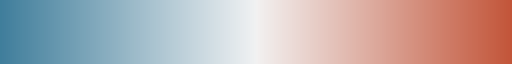

In [37]:
cmap

<AxesSubplot:>

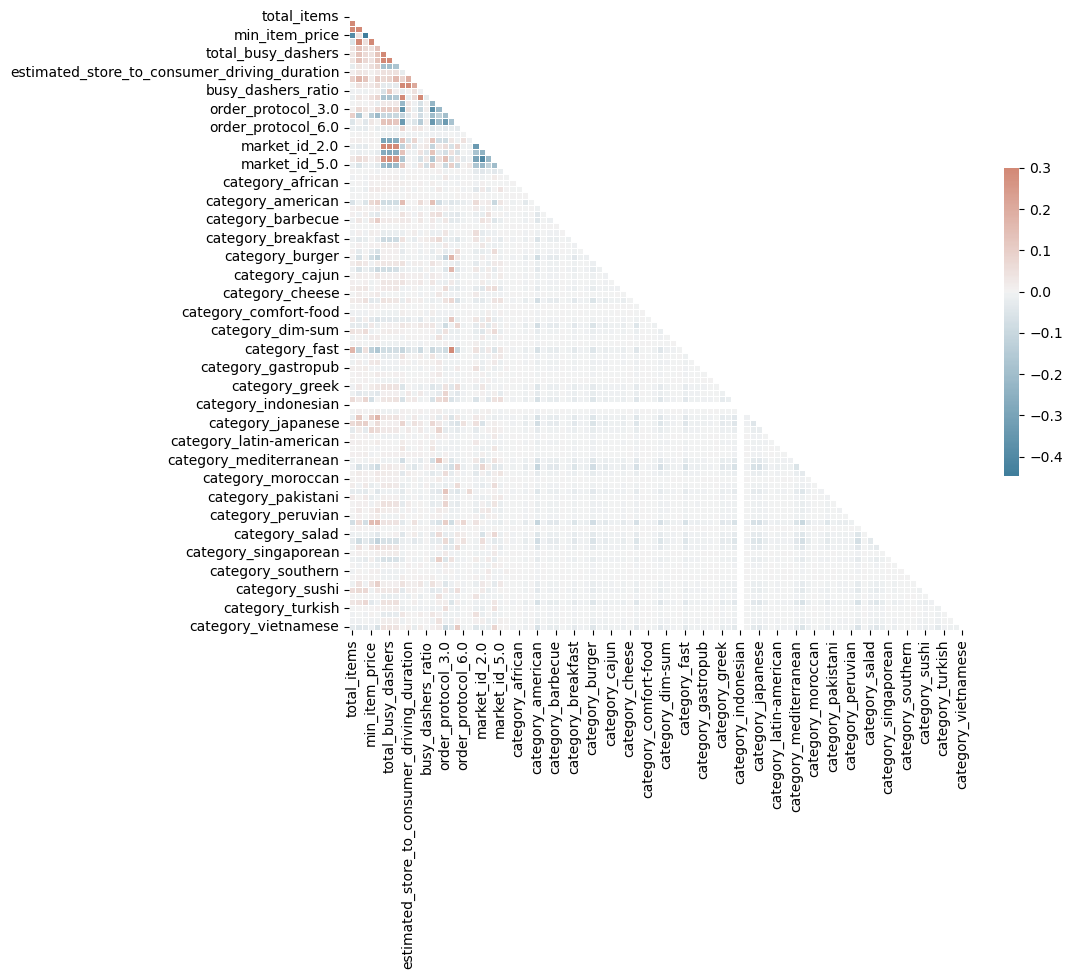

In [38]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems there is a problem with `category_indonesian`. Check with .describe( ).



In [39]:
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

It has a zero std value. We can drop it. Let's see the top correlated features.

Two functions to test the correlations:
1. Get redundant values
2. Find top correalted features

In [40]:
corr['total_busy_dashers']['total_outstanding_orders']

0.931294802386519

In [41]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    """Sort correlations in the descending order and return n highest results"""
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_items          

We can see that `total_busy_dashers` and `total_onshift_dashers` are highly correlated. As we created `busy_dashers_ratio` from these two features so we can drop them. Then our created feature `estimated_non_prep_duration` is correlated with the original feature `estimated_store_to_consumer_driving_duration`, so we can drop the one we created. Additionally, market id values are also on the list as being correlated with each other. As same with all kinds of colliniearities, these are potential suspects to hurt the regression performance. We won't concat them into the dataframe anymore. After that we'll check the correlations again.

In [42]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "wo_nan_store_primary_category", "order_protocol"])
# don't concat market id
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)
# drop highly correlated features
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
                                  "category_indonesian", 
                                  "estimated_non_prep_duration"])
# align dtype over dataset
train_df = train_df.astype("float32")
# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head(2)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
train_df.shape

(177070, 90)

In [44]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol_1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol_4.0              category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol_1.0              order_protocol_3.0    0.373581
estimated_order_place_duration  order_protocol_3.0    0.364170
order_protocol_1.0              order_protocol_5.0    0.342345
estimated_order_place_duration  order_protocol_5.0    0.333291
order_protocol_3.0              order_protocol_5.0    0.332533
order_protocol_1.0              order_protocol_2.0    0.226903
estimated_order_place_duratio

It seems order protocols are also highly correlated with each other. We also won't concatenate them. Let's repeat the process one more time.

In [45]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "wo_nan_store_primary_category", "order_protocol"])
# don't concat order_protocol_dummies
train_df = pd.concat([train_df, store_primary_category_dummies], axis=1)
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
                                  "category_indonesian", 
                                  "estimated_non_prep_duration"])
# align dtype over dataset
train_df = train_df.astype("float32")
# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head(2)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
subtotal                                      actual_total_delivery_duration    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.17

Still, we have some features with high correlations. The total item number or distinct items could affect the duration of the preparation process. Therefore, we do not prefer to drop them. Instead, we can use the power of feature engineering. We will create new columns to infer the contribution of these columns.

In [47]:
# new features to deal with `num_distinct_items`, `subtotal` and `total_items`
train_df["percent_distinct_item_of_total"] = train_df["num_distinct_items"] / train_df["total_items"]
train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]
train_df.drop(columns=["num_distinct_items", "subtotal"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
max_item_price                                percent_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                0.17

In [48]:
# new features to deal with `max_item_price` and `min_item_price`
train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]
train_df.drop(columns=["max_item_price", "min_item_price"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      actual_total_delivery_duration    0.15

We solved the main issues with correlation. We are done with feature engineering now. We can officially apply a multicollinearity check in the next step.

In [49]:
train_df.shape

(177070, 82)

#### Multicollinearity Check

We will check it through Variance Inflation Factor (VIF). We will make 2 dataset, in one we'll eliminate all features that have VIF score above 20 and in another we'll eliminate all features that have VIF score above 10. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def compute_vif(features):
    """Compute VIF score using variance_inflation_factor() function"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [52]:
# apply VIF computation to all columns
features = train_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list() # removing the target variable first
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000493
2,category_belgian,1.000749
3,category_russian,1.003226
4,category_african,1.003820
...,...,...
76,busy_dashers_ratio,6.369592
77,category_american,7.033601
78,estimated_store_to_consumer_driving_duration,7.210822
79,estimated_order_place_duration,13.472126


In [53]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("Removing", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

Removing percent_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000365
2,category_belgian,1.000451
3,category_russian,1.002016
4,category_gluten-free,1.002363
...,...,...
75,category_american,4.505927
76,avg_price_per_item,5.958955
77,busy_dashers_ratio,6.357884
78,estimated_store_to_consumer_driving_duration,7.192622


In [54]:
# drop with highest vif score until all vif scores are under 10
vif_data_10 = vif_data
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data_10['feature'].values.tolist()[-1]
    print("Removing", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data_10 = compute_vif(features)
    multicollinearity = False if len(vif_data_10[vif_data_10.VIF > 10]) == 0 else True

selected_features_10 = vif_data_10['feature'].values.tolist()
vif_data_10

Removing estimated_order_place_duration


,feature,VIF
0,category_alcohol-plus-food,1.000183
1,category_belgian,1.000189
2,category_chocolate,1.000241
3,category_gluten-free,1.001113
4,category_russian,1.001319
...,...,...
74,category_pizza,3.035299
75,total_items,3.143991
76,avg_price_per_item,5.921218
77,busy_dashers_ratio,6.357052


#### Feature Selection

We have a rich feature set. To reduce the noise in the model and decrease the training duration, we can use a subset of these features in the modeling part. Therefore, we will investigate the feature importances. First, we use RandomForestRegressor to get the importance of each feature in the prediction of the actual total delivery duration.

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# selected features are selected in multicollinearity check part
X = train_df[selected_features] # features
X_10 = train_df[selected_features_10]
y = train_df["actual_total_delivery_duration"] # target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) # splitting data for train test 

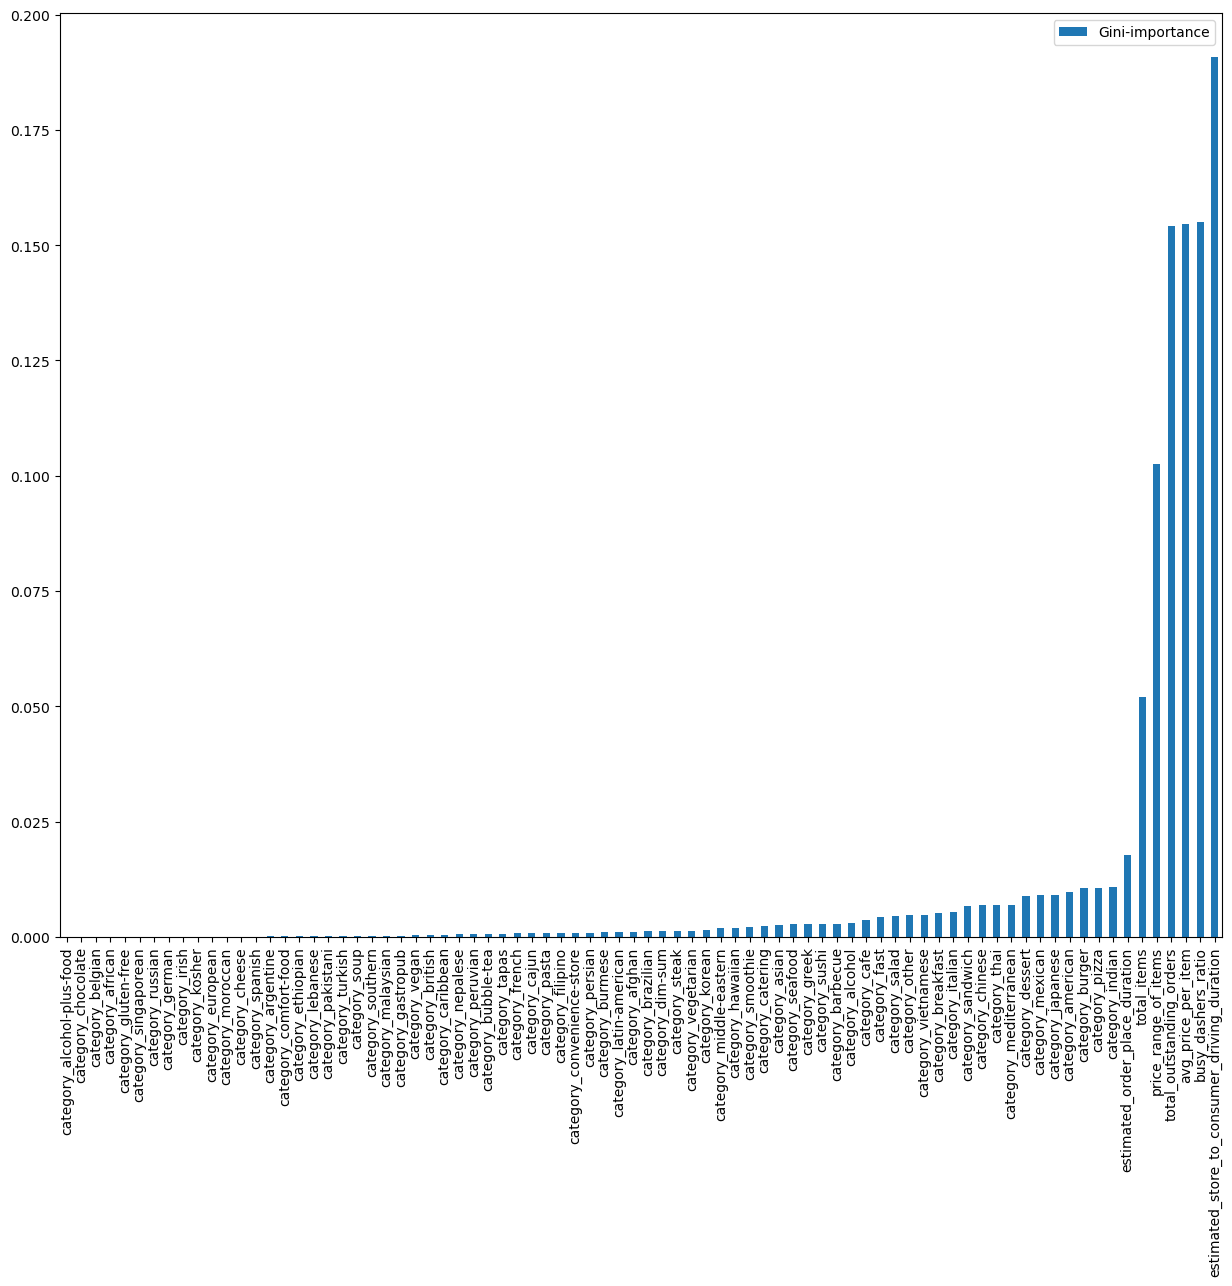

In [56]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

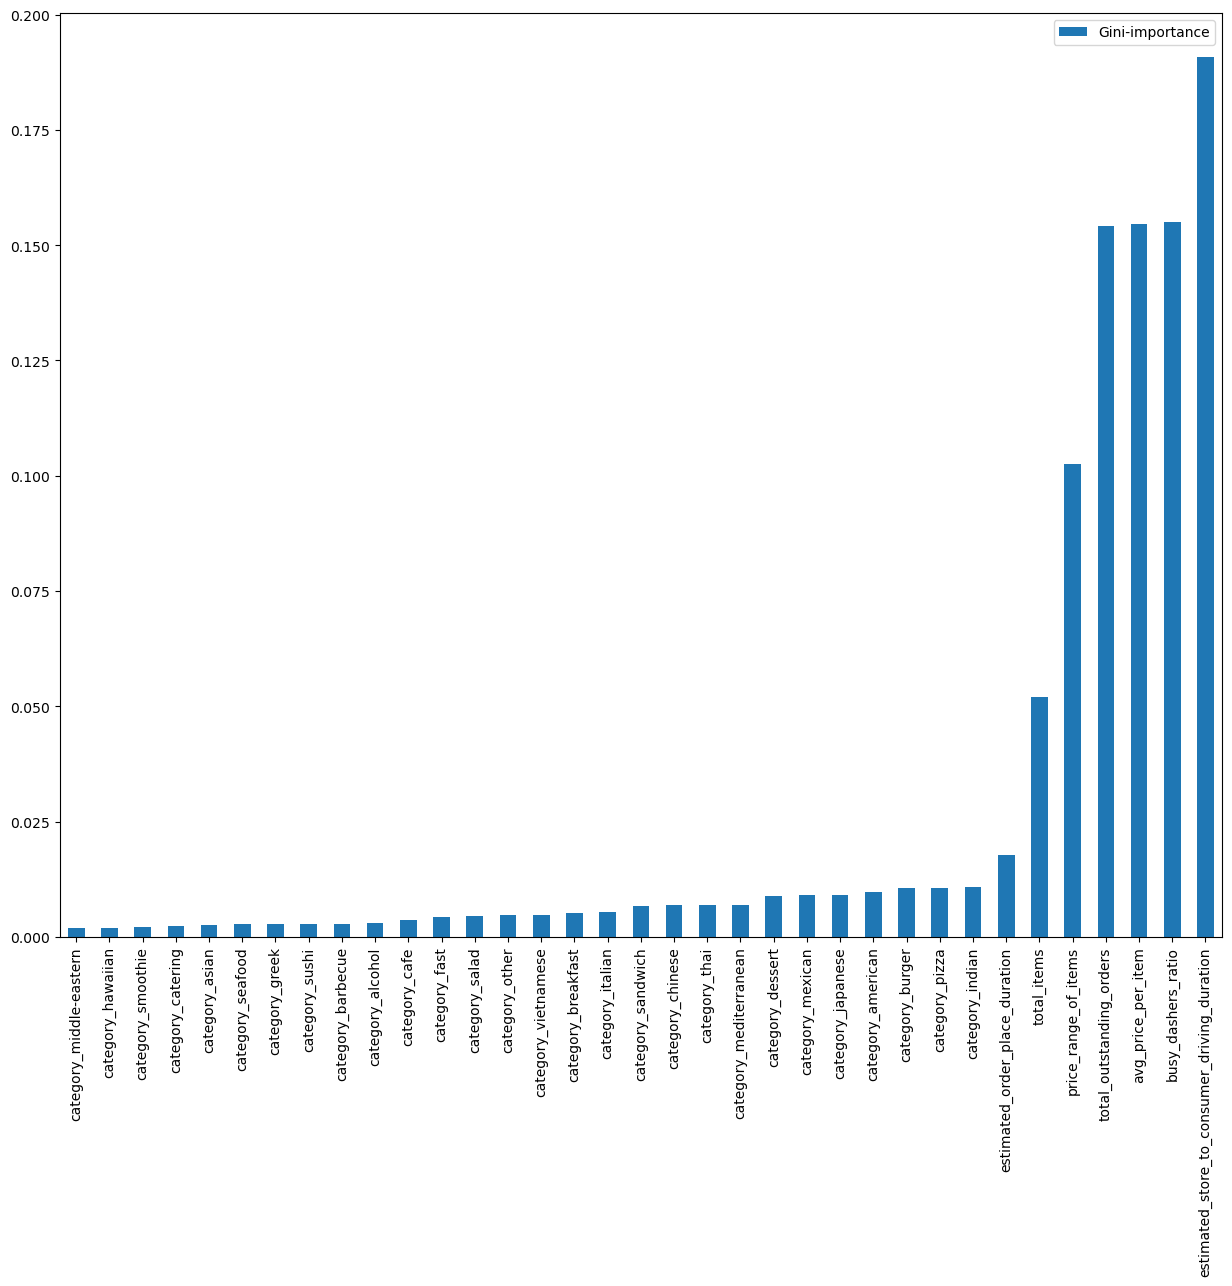

In [58]:
# check the most important ones
importances.sort_values(by='Gini-importance')[-35:].plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

In [59]:
# we can obtain the column names as next
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_smoothie',
 'category_catering',
 'category_asian',
 'category_seafood',
 'category_greek',
 'category_sushi',
 'category_barbecue',
 'category_alcohol',
 'category_cafe',
 'category_fast',
 'category_salad',
 'category_other',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_dessert',
 'category_mexican',
 'category_japanese',
 'category_american',
 'category_burger',
 'category_pizza',
 'category_indian',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'total_outstanding_orders',
 'avg_price_per_item',
 'busy_dashers_ratio',
 'estimated_store_to_consumer_driving_duration']

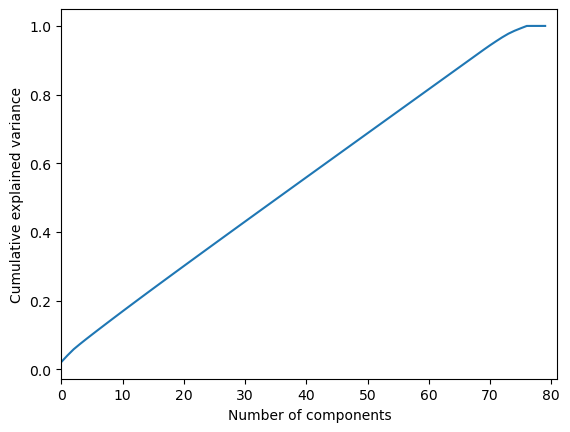

In [60]:
# apply PCA to see feature contributions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

PCA shows that we need to use at least 60 representative features to explain 80% of the dataset, which makes the PCA transformation useless since we already have 80 and could select the most important ones based on feature importance. However, if PCA would tell us it can explain the majority of variance with around 10 features - high reduction - we would continue with it.